<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Proyecto_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Analítica de Negocios**
## **Proyecto Integrador**
### Tecnológico de Monterrey
### Prof Raul Montalvo
--------

## **Integrantes:**
### Carlos López - A00947174
### Miguel Sánchez Rivas - A00736968
### Javier Rivera - A
### Luisiana M - A
### Hernán Gonzalez - A
--------

La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y organizaciones, grandes o pequeñas. En este proyecto usaremos una base de datos de la empresa Denso México para estudiar cómo enfrentar dicho problema.

### **PARTE 1: Análisis descriptivo y preprocesamiento de los datos:**

#### **1) Introducción (employee attrition problem):**

El problema de rotación de personal, o employee attrition problem, se refiere a la frecuencia con la que los empleados abandonan sus puestos en una organización. Esto genera varios desafíos:
1. Costos financieros: Contratar y capacitar nuevos empleados es costoso.
2. Disminución de la productividad: La búsqueda y adaptación de nuevos empleados puede reducir la productividad del equipo.
3. Impacto en la moral y el compromiso: La rotación constante puede desmotivar al personal y afectar la cultura de la empresa.
4. Pérdida de conocimiento y experiencia: Cada partida implica la pérdida de habilidades y conocimientos.
5. Dificultades en la retención de talento: La alta rotación dificulta retener a los empleados más talentosos y valiosos.
Por lo que gestionar la rotación de personal es esencial para el éxito a largo plazo de una organización.




#### **2) Carga de la base de datos realizando una partición de los datos en Entrenamiento y Prueba del 80% y 20% respectivamente. Los conjuntos se llamarán  Xtrain, Xtest, ytrain, ytest, para los datos de entrada y de salida, respectivamente.**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para un mejor despliegue de los gráficos
sns.set_theme(color_codes=True)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files

uploaded = files.upload()

Saving DNMX Database to upload.xlsx to DNMX Database to upload.xlsx


In [4]:
# Dandole una variable al archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo Excel
df = pd.read_excel(file_name)

# Mostrar las primeras filas del DataFrame
df.head()

ID  Dep. No.                Dep. Name Dep. Class  Chief ID  \
0   1         4  Manufacturing Executive  Exclusive      9187   
1   2       240               Purchasing     Common       848   
2   3      1000     Executive (SPP, SGA)  Exclusive        86   
3   4       224  Molds Maintenance (CPS)  Exclusive       519   
4   5         5             QE Executive  Exclusive         1   

        Position Name                     Position ID Employee Type  \
0                  VP                          10VPVP      Empleado   
1       HR Generalist           6HR & GAHR Generalist      Empleado   
2            Director               9DirectorDirector      Empleado   
3  Machines & Molding  5MaintenanceMachines & Molding      Empleado   
4            Director               9DirectorDirector      Empleado   

  Nacionality  Employee Type ID     Class  Status           Subposition  \
0    Mexicano                 2  Indirect  Active        VICEPRESIDENTE   
1    Mexicano                 2  Indirect    Quit  ASISTENTE DE GERENTE   
2    Mexicano                 2  Indirect  Active              DIRECTOR   
3    Mexicano                 2  Indirect  Active            SUPERVISOR   
4    Mexicano                 2  Indirect  Active              DIRECTOR   

  Turn Code Position Level  Hire Date   End Date Gender  Years in Company  \
0      4161             10 1995-05-22 2024-05-12   Male         28.994521   
1      4161              6 1995-06-05 2023-01-01   Male         27.594521   
2      4161              9 1995-06-19 2024-05-12   Male         28.917808   
3      4161              5 1995-07-17 2024-05-12   Male         28.841096   
4      4161              9 1995-07-24 2024-05-12   Male         28.821918   

   Attrition 3 years Plant      Type                      Category  \
0                  1   APP       SGA  DNMX | APP/GPP Manufacturing   
1                  1   APP  Indirect     DNMX | APP/GPP Purchasing   
2                  1   SPP       SGA           DNMX | HR-IT-FAC-GA   
3                  1   APP  Indirect  DNMX | APP/GPP Manufacturing   
4                  1   APP       SGA             DNMX | APP/GPP QE   

                     Function                    Area Business Unit  \
0                 Exe & Other              Executives        Common   
1                  Purchasing             Purchashing        Common   
2  HR Union / AS (All plants)          Asocc. Service        Common   
3         Maintenance CPS/Die  Maintenance APP Plant1           CPS   
4                 Exe & Other              Executives        Common   

               Manager                   GM           Director  \
0    Alejandro Mendoza    Alejandro Mendoza  Alejandro Mendoza   
1  Luis Alberto Torres  Carlos Alberto Ruiz      Takuya Suzuki   
2       Daniel Sánchez    Guillermo Sánchez  Guillermo Sánchez   
3          Raúl Medina        Andrés Torres      Andrés Torres   
4       Rodrigo Torres       Rodrigo Torres     Rodrigo Torres   

                  VP              BP  
0  Alejandro Mendoza  Laura González  
1      Takuya Suzuki  Laura González  
2     Kenji Nakamura  Laura González  
3  Alejandro Mendoza  Satoshi Suzuki  
4  Alejandro Mendoza  Laura González

In [5]:
#from google.colab import drive

#drive.mount('/content/drive')

#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Carlos
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Miguel
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Javier
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Luisiana
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Hernán

#df.head(3)

In [6]:
# Cargar base de datos de manera local:
# df = pd.read_csv(local_path)
# df.head(3)

Antes que nada busquemos columnas con renglones vacíos

In [7]:
# Calcular la cantidad de valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar para mostrar solo aquellos que son diferentes de cero
null_counts_nonzero = null_counts[null_counts != 0]

# Mostrar los resultados
print("Cantidad de valores nulos por columna que son diferentes de cero:")
print(null_counts_nonzero)

Cantidad de valores nulos por columna que son diferentes de cero:
Series([], dtype: int64)


Y entendamos el tipo de dato para cada columna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 9240 non-null   int64         
 1   Dep. No.           9240 non-null   int64         
 2   Dep. Name          9240 non-null   object        
 3   Dep. Class         9240 non-null   object        
 4   Chief ID           9240 non-null   int64         
 5   Position Name      9240 non-null   object        
 6   Position ID        9240 non-null   object        
 7   Employee Type      9240 non-null   object        
 8   Nacionality        9240 non-null   object        
 9   Employee Type ID   9240 non-null   int64         
 10  Class              9240 non-null   object        
 11  Status             9240 non-null   object        
 12  Subposition        9240 non-null   object        
 13  Turn Code          9240 non-null   object        
 14  Position

In [9]:
df.nunique()

ID                   9240
Dep. No.              286
Dep. Name             284
Dep. Class              2
Chief ID              446
Position Name         103
Position ID           214
Employee Type           8
Nacionality             2
Employee Type ID        5
Class                   2
Status                  3
Subposition            47
Turn Code              13
Position Level         19
Hire Date            1469
End Date                3
Gender                  2
Years in Company     1528
Attrition 3 years       2
Plant                   4
Type                    3
Category               16
Function               47
Area                   83
Business Unit          16
Manager                76
GM                     36
Director               18
VP                      6
BP                      6
dtype: int64

Ahora separemos nuestra variable predictora de nuestra base de datos.

In [10]:
# Separamos los factores de entrada y la variable de salida:
X = df.drop('Attrition 3 years', axis=1)
y = df['Attrition 3 years']

**Separamos la dimensión obtenida de los dos conjuntos: Entrenamiento y Prueba.**

In [11]:
# Dividir los datos en entrenamiento (80%) y temporal (20%)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state= 0)

print("Entrenamiento X:", Xtrain.shape,    '%.1f%%' % (100 * Xtrain.shape[0]  / (Xtrain.shape[0] + Xtest.shape[0] )))
print("Prueba        X:", Xtest.shape,     '%.1f%%' % (100 * Xtest.shape[0]   / (Xtrain.shape[0] + Xtest.shape[0] )))

print("Entrenamiento y:", ytrain.shape,    '%.1f%%' % (100 * ytrain.shape[0]  / (ytrain.shape[0] + ytest.shape[0] )))
print("Prueba        y:", ytest.shape,     '%.1f%%' % (100 * ytest.shape[0]   / (ytrain.shape[0] + ytest.shape[0] )))

Entrenamiento X: (7392, 30) 80.0%
Prueba        X: (1848, 30) 20.0%
Entrenamiento y: (7392,) 80.0%
Prueba        y: (1848,) 20.0%


###**Análisis exploratorio variables numéricas**

En nuestro analisis inicial, realizaremos pruebas de correlaciones para nuestros datos numéricos y así identificar todas aquellas probables variables que no estarían proporcionando información adicional significativa sobre la rotación.

Primero seleccionamos las variables numéricas


In [12]:
def select_numeric_variables(data):
    """
    Selecciona las variables numéricas de un DataFrame.

    Args:
    - df: DataFrame. El DataFrame del cual seleccionar las variables numéricas.

    Returns:
    - num_vars: DataFrame. Un DataFrame que contiene solo las variables numéricas del DataFrame original.
    """
    # Seleccionar solo las columnas con tipos de datos numéricos
    num_vars = Xtrain.select_dtypes(include=['int64', 'float64'])

    return num_vars

# Llamar a la función y guardar el resultado en una variable
num_vars = select_numeric_variables(Xtrain)

In [13]:
num_vars.head()

ID  Dep. No.  Chief ID  Employee Type ID  Years in Company
295    296       273       319                 1         22.147945
1657  1658       271       197                 1          9.279452
4592  4593       451       811                 1          2.106849
3558  3559      1370       360                 1          6.728767
629    630       252       993                 1         18.082192

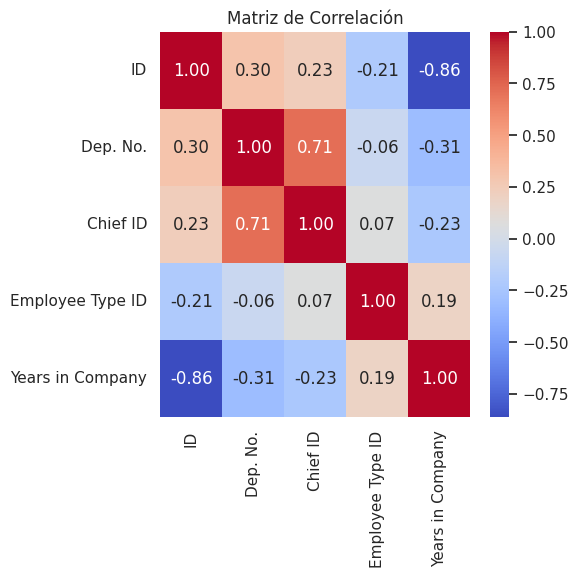

In [14]:
# Calcular la matriz de correlación entre las variables, solo tomará en cuenta las numéricas
correlation_matrix_Xtrain = num_vars.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_Xtrain, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

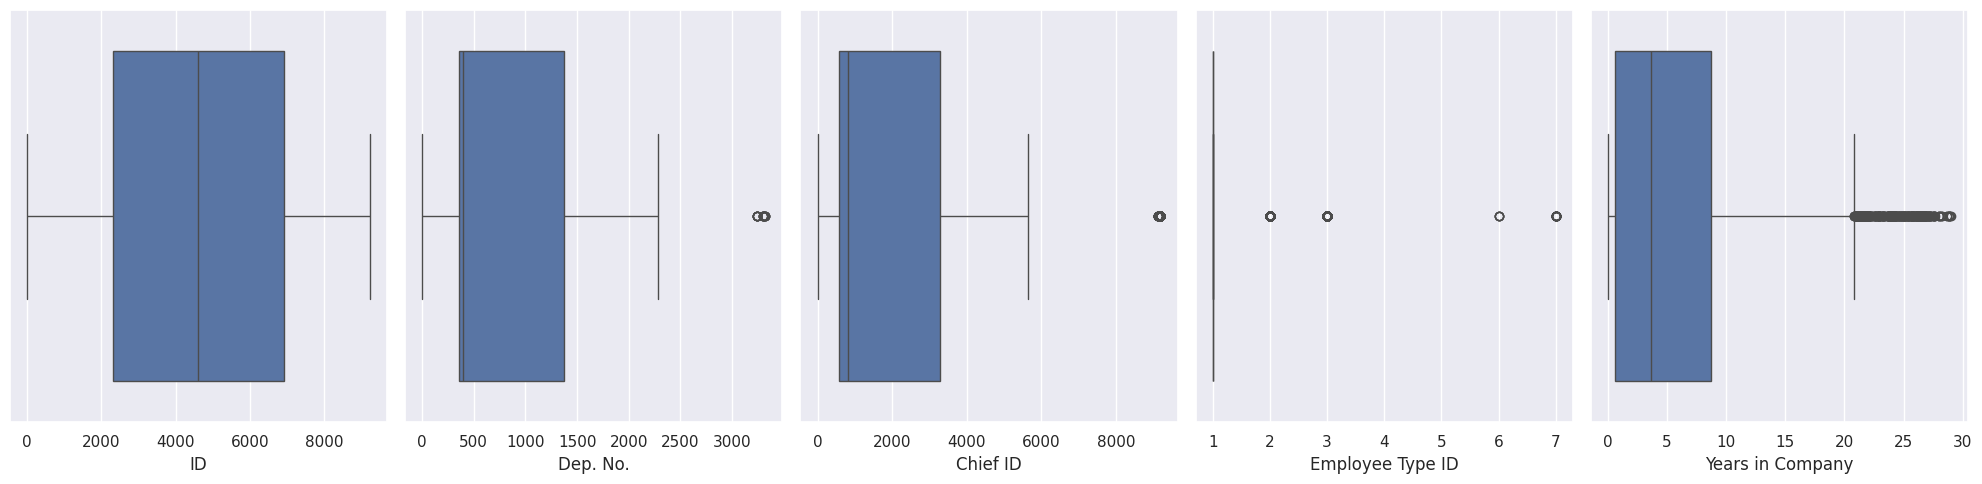

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=Xtrain, ax=axs[i])

fig.tight_layout()

plt.show()

### **Hacemos un análisis exploratorio de los datos Categóricos**

In [16]:
#Creamos la lista sin la variable predictora
def select_categorical_variables(data):
    """
    Selecciona las variables categóricas de un DataFrame.

    Args:
    - df: DataFrame. El DataFrame del cual seleccionar las variables categóricas.

    Returns:
    - cat_vars: DataFrame. Un DataFrame que contiene solo las variables categóricas del DataFrame original.
    """
    # Seleccionar solo las columnas con tipos de datos de objeto (categóricas)
    cat_vars = df.select_dtypes(include=['object'])

    return cat_vars

# Llamar a la función y guardar el resultado en una variable
cat_vars = select_categorical_variables(Xtrain)
cat_vars.head()

Dep. Name Dep. Class       Position Name  \
0  Manufacturing Executive  Exclusive                  VP   
1               Purchasing     Common       HR Generalist   
2     Executive (SPP, SGA)  Exclusive            Director   
3  Molds Maintenance (CPS)  Exclusive  Machines & Molding   
4             QE Executive  Exclusive            Director   

                      Position ID Employee Type Nacionality     Class  Status  \
0                          10VPVP      Empleado    Mexicano  Indirect  Active   
1           6HR & GAHR Generalist      Empleado    Mexicano  Indirect    Quit   
2               9DirectorDirector      Empleado    Mexicano  Indirect  Active   
3  5MaintenanceMachines & Molding      Empleado    Mexicano  Indirect  Active   
4               9DirectorDirector      Empleado    Mexicano  Indirect  Active   

            Subposition Turn Code Position Level Gender Plant      Type  \
0        VICEPRESIDENTE      4161             10   Male   APP       SGA   
1  ASISTENTE DE GERENTE      4161              6   Male   APP  Indirect   
2              DIRECTOR      4161              9   Male   SPP       SGA   
3            SUPERVISOR      4161              5   Male   APP  Indirect   
4              DIRECTOR      4161              9   Male   APP       SGA   

                       Category                    Function  \
0  DNMX | APP/GPP Manufacturing                 Exe & Other   
1     DNMX | APP/GPP Purchasing                  Purchasing   
2           DNMX | HR-IT-FAC-GA  HR Union / AS (All plants)   
3  DNMX | APP/GPP Manufacturing         Maintenance CPS/Die   
4             DNMX | APP/GPP QE                 Exe & Other   

                     Area Business Unit              Manager  \
0              Executives        Common    Alejandro Mendoza   
1             Purchashing        Common  Luis Alberto Torres   
2          Asocc. Service        Common       Daniel Sánchez   
3  Maintenance APP Plant1           CPS          Raúl Medina   
4              Executives        Common       Rodrigo Torres   

                    GM           Director                 VP              BP  
0    Alejandro Mendoza  Alejandro Mendoza  Alejandro Mendoza  Laura González  
1  Carlos Alberto Ruiz      Takuya Suzuki      Takuya Suzuki  Laura González  
2    Guillermo Sánchez  Guillermo Sánchez     Kenji Nakamura  Laura González  
3        Andrés Torres      Andrés Torres  Alejandro Mendoza  Satoshi Suzuki  
4       Rodrigo Torres     Rodrigo Torres  Alejandro Mendoza  Laura González

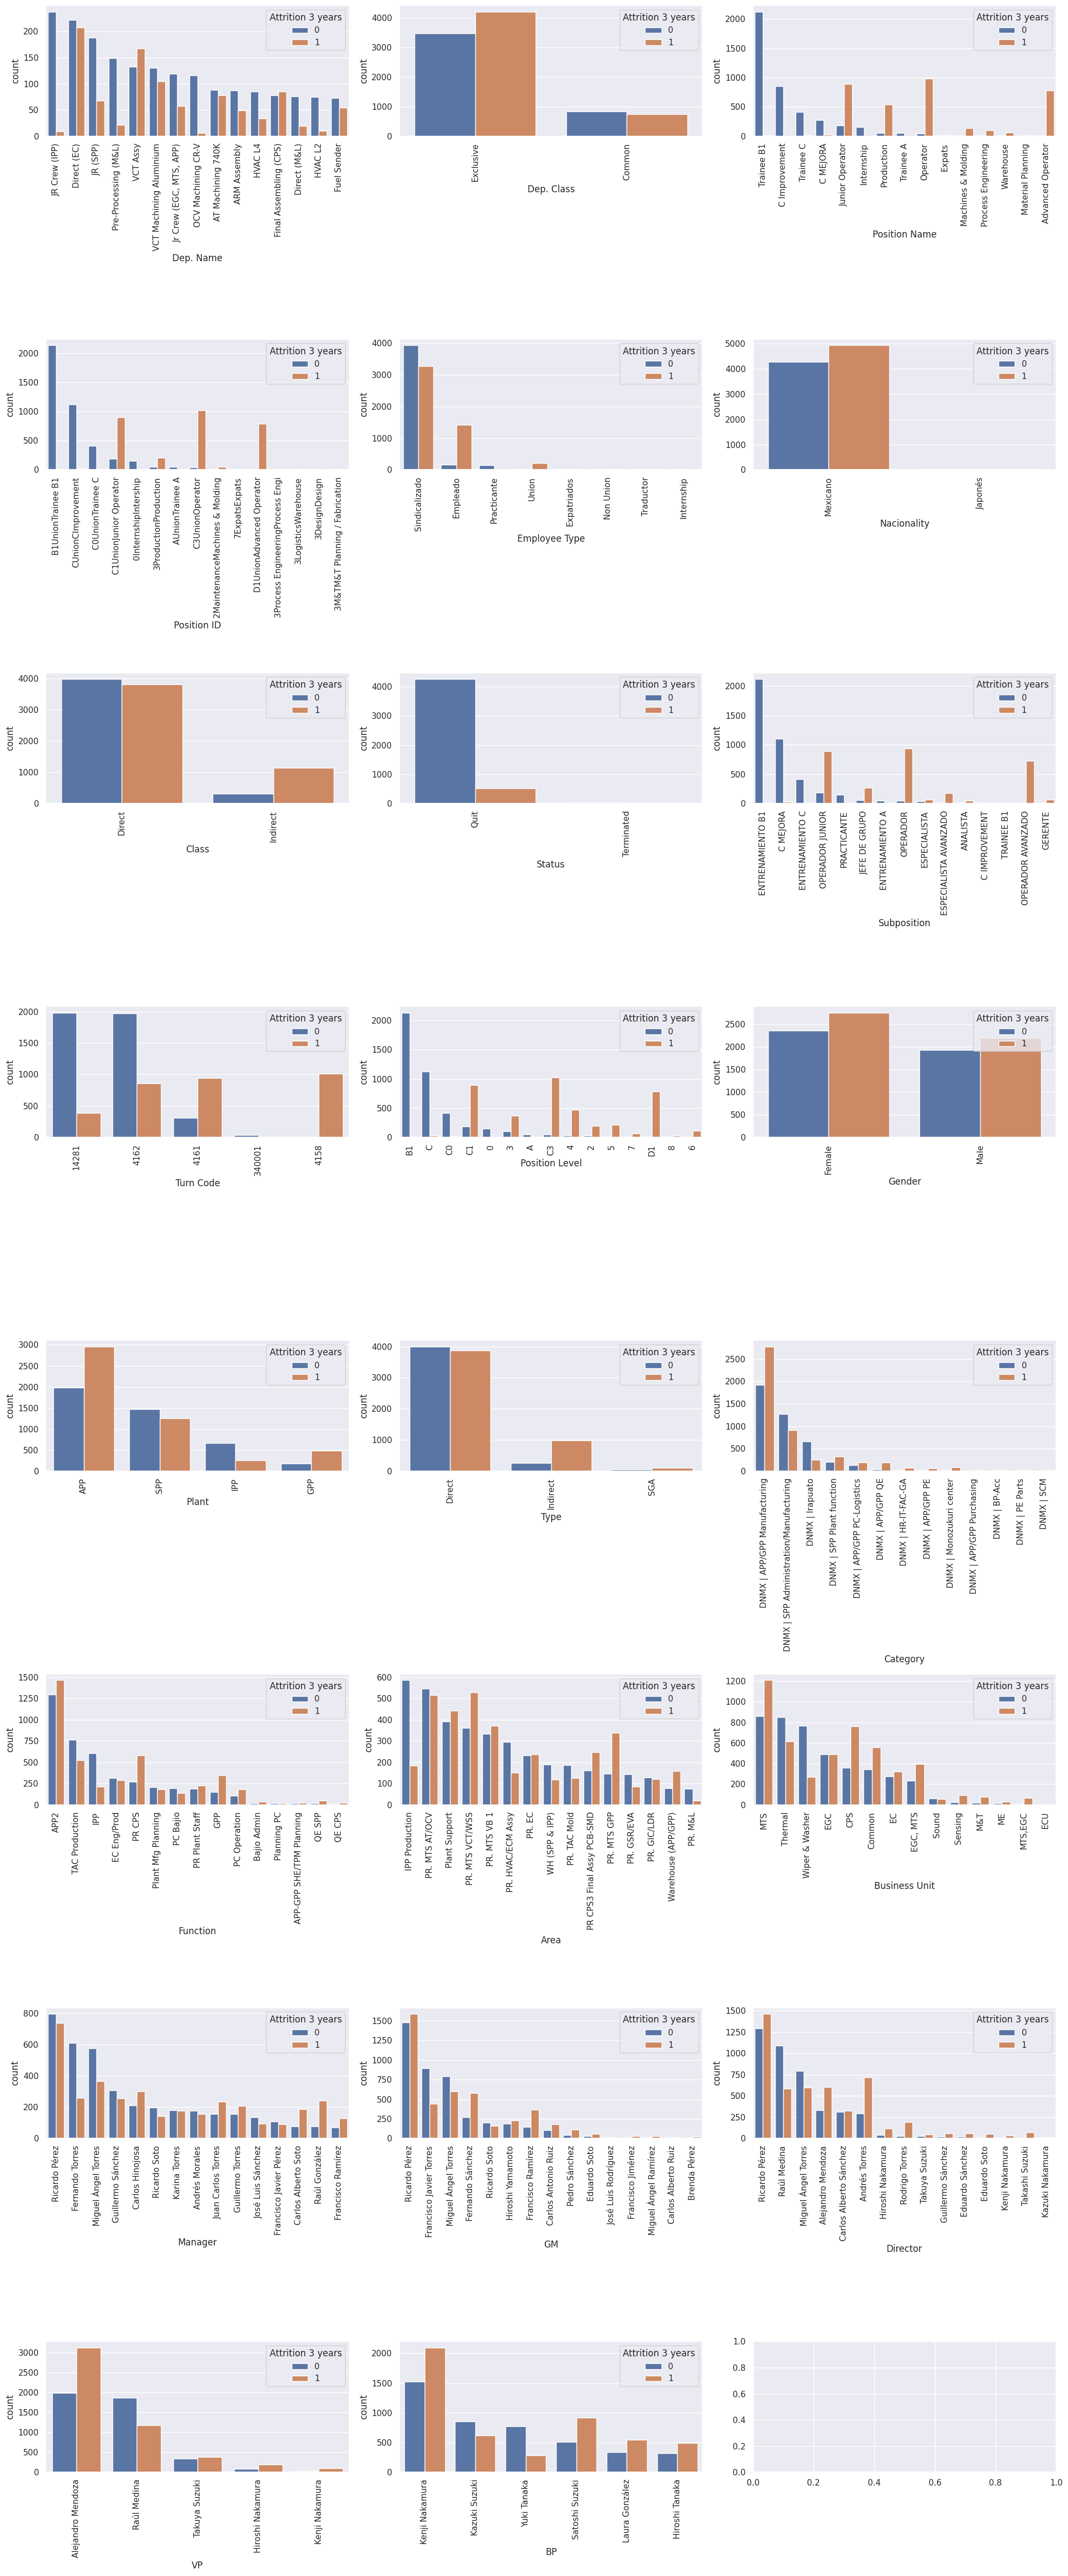

In [31]:
# Variables para filtrar y ordenar
filter_variables = [
    'Dep. Name', 'Dep. Class', 'Position Name', 'Position ID', 'Employee Type', 'Nacionality', 'Class',
    'Status', 'Subposition', 'Turn Code', 'Position Level', 'Gender', 'Plant', 'Type', 'Category', 'Function',
    'Area', 'Business Unit', 'Manager', 'GM', 'Director', 'VP', 'BP'
]

# Crear figuras con subplots
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df[df['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada
    sns.countplot(x=var, hue='Attrition 3 years', data=df, order=sorted_categories, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

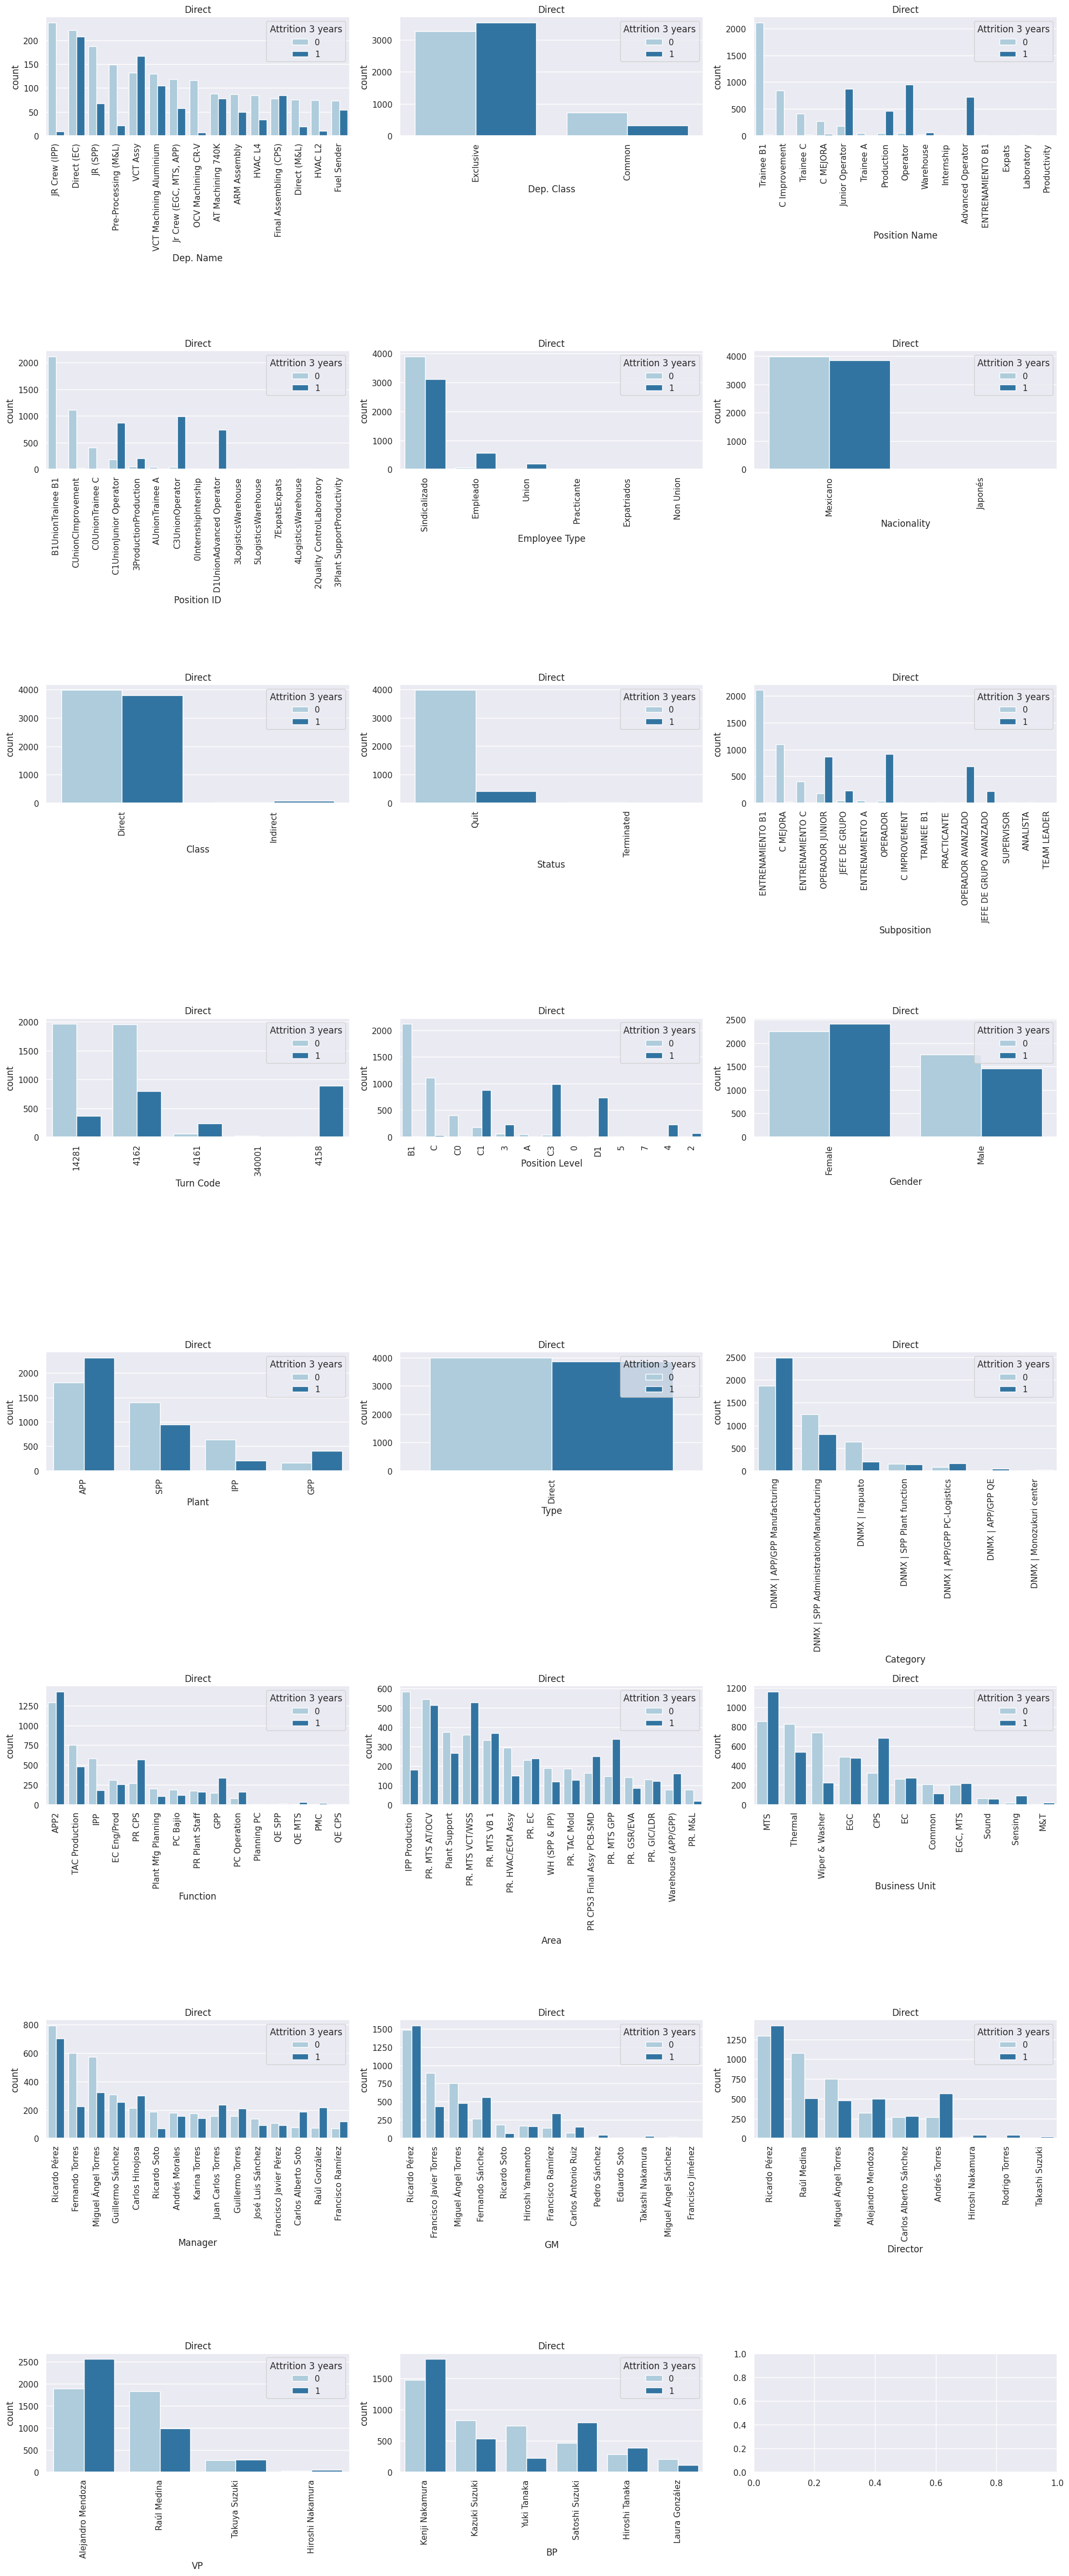

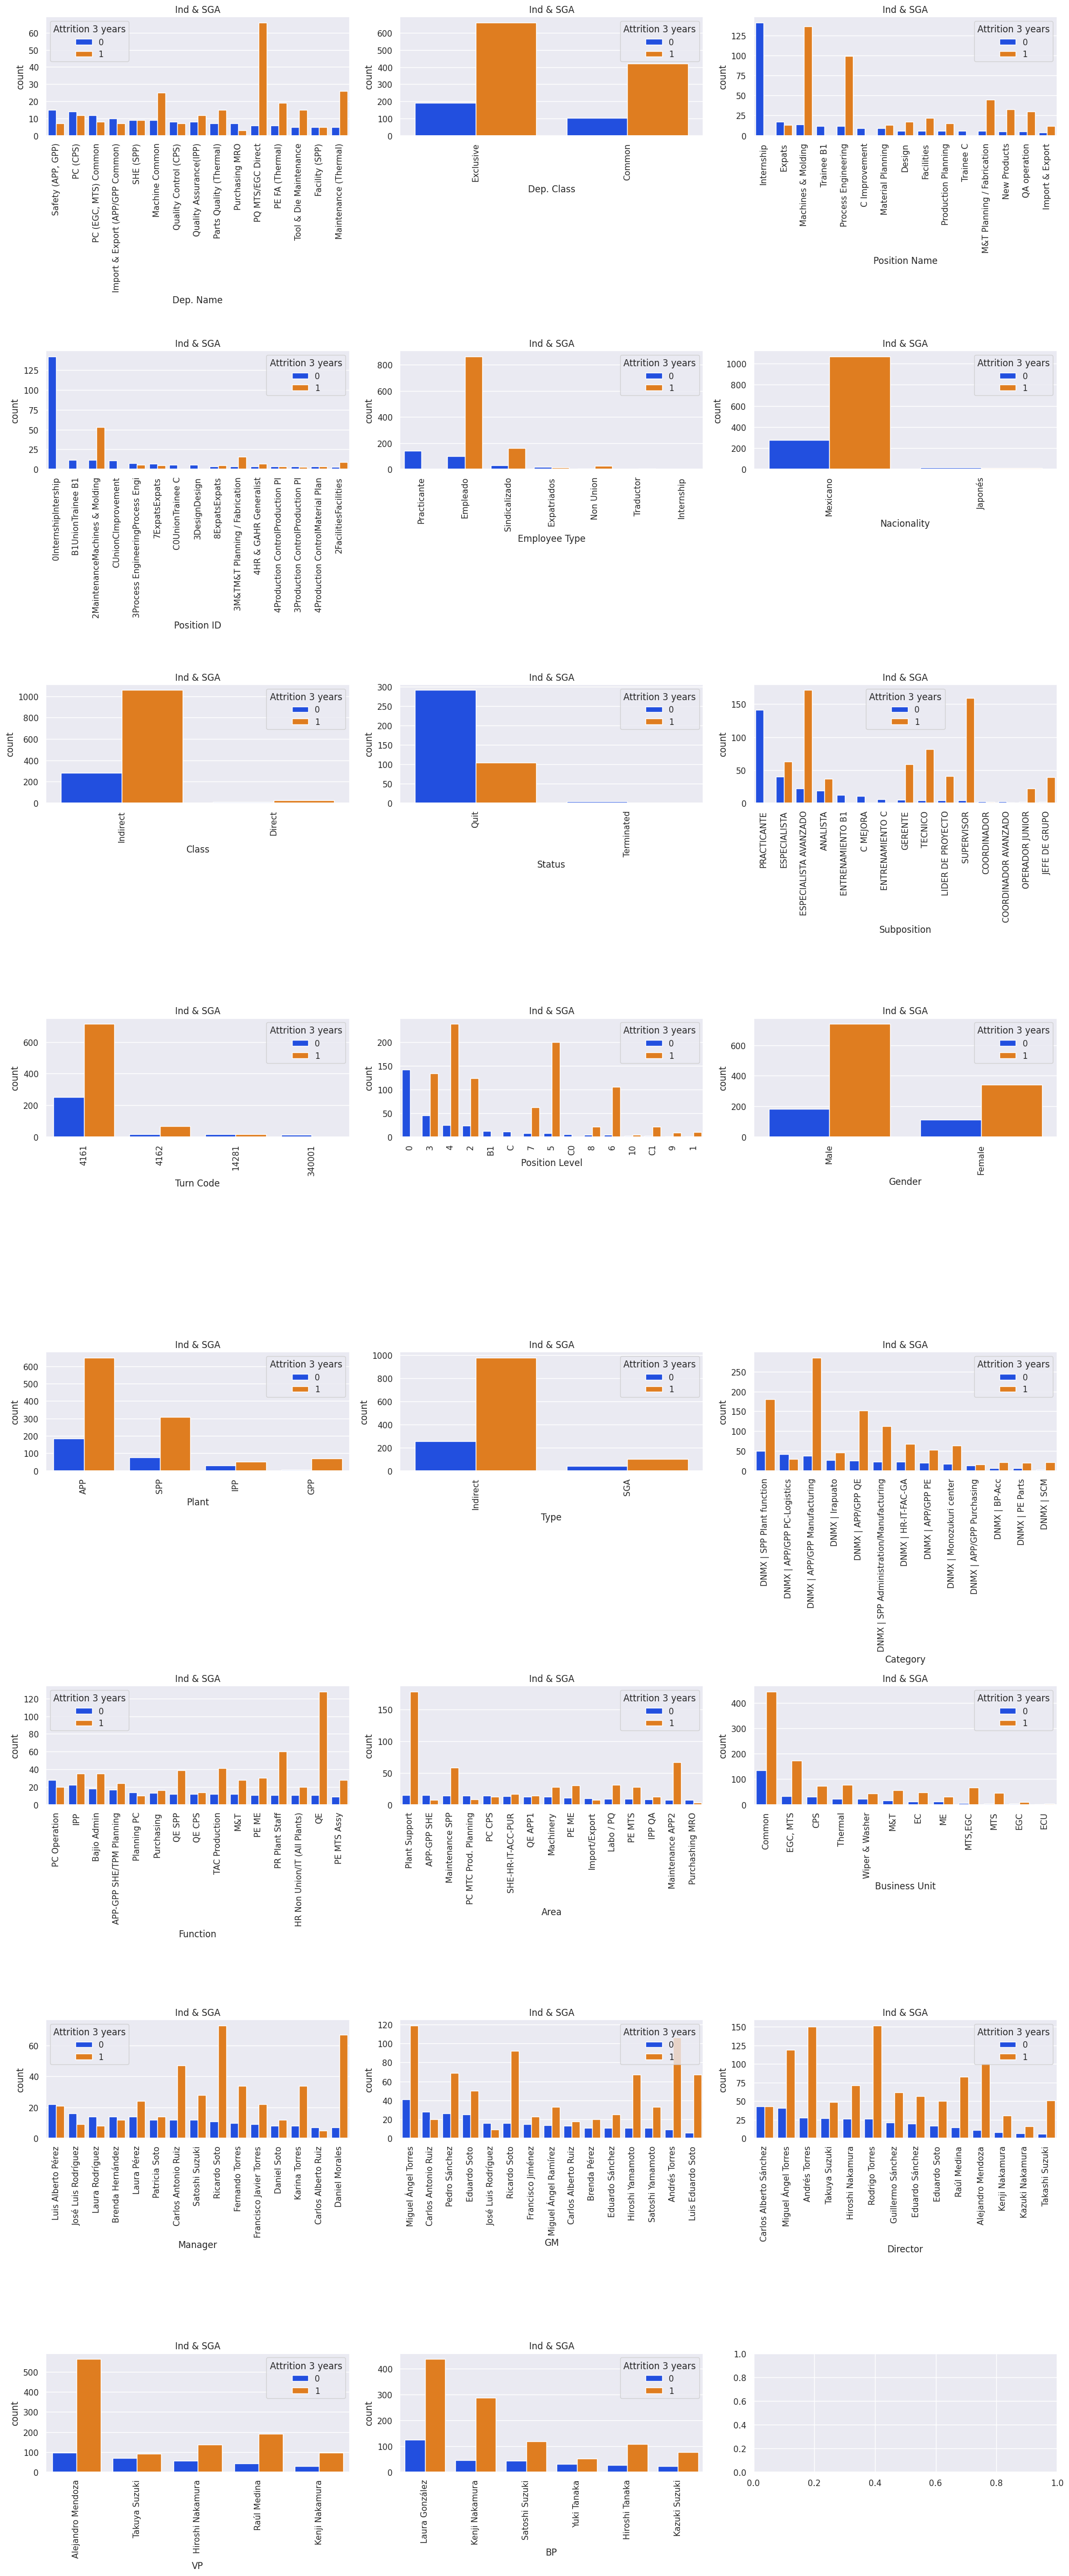

In [45]:
# Variables para filtrar y ordenar
filter_variables = [
    'Dep. Name', 'Dep. Class', 'Position Name', 'Position ID', 'Employee Type', 'Nacionality', 'Class',
    'Status', 'Subposition', 'Turn Code', 'Position Level', 'Gender', 'Plant', 'Type', 'Category', 'Function',
    'Area', 'Business Unit', 'Manager', 'GM', 'Director', 'VP', 'BP'
]

# Filtrar el DataFrame para "Directos" y "Indirectos y SGA"
df_directos = df[df['Type'] == 'Direct']
df_indirectos_sga = df[df['Type'].isin(['Indirect', 'SGA'])]

# Crear figuras con subplots para Directos
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Directos
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_directos[df_directos['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada para Directos
    sns.countplot(x=var, hue='Attrition 3 years', data=df_directos, order=sorted_categories, ax=axs[i], palette='Paired')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Direct')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Directos
plt.show()

# Crear figuras con subplots para Indirectos y SGA
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Indirectos y SGA
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_indirectos_sga[df_indirectos_sga['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada para Indirectos y SGA
    sns.countplot(x=var, hue='Attrition 3 years', data=df_indirectos_sga, order=sorted_categories, ax=axs[i], palette='bright')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Ind & SGA')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Indirectos y SGA
plt.show()

Creamos histogramas para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition de un ángulo diferente

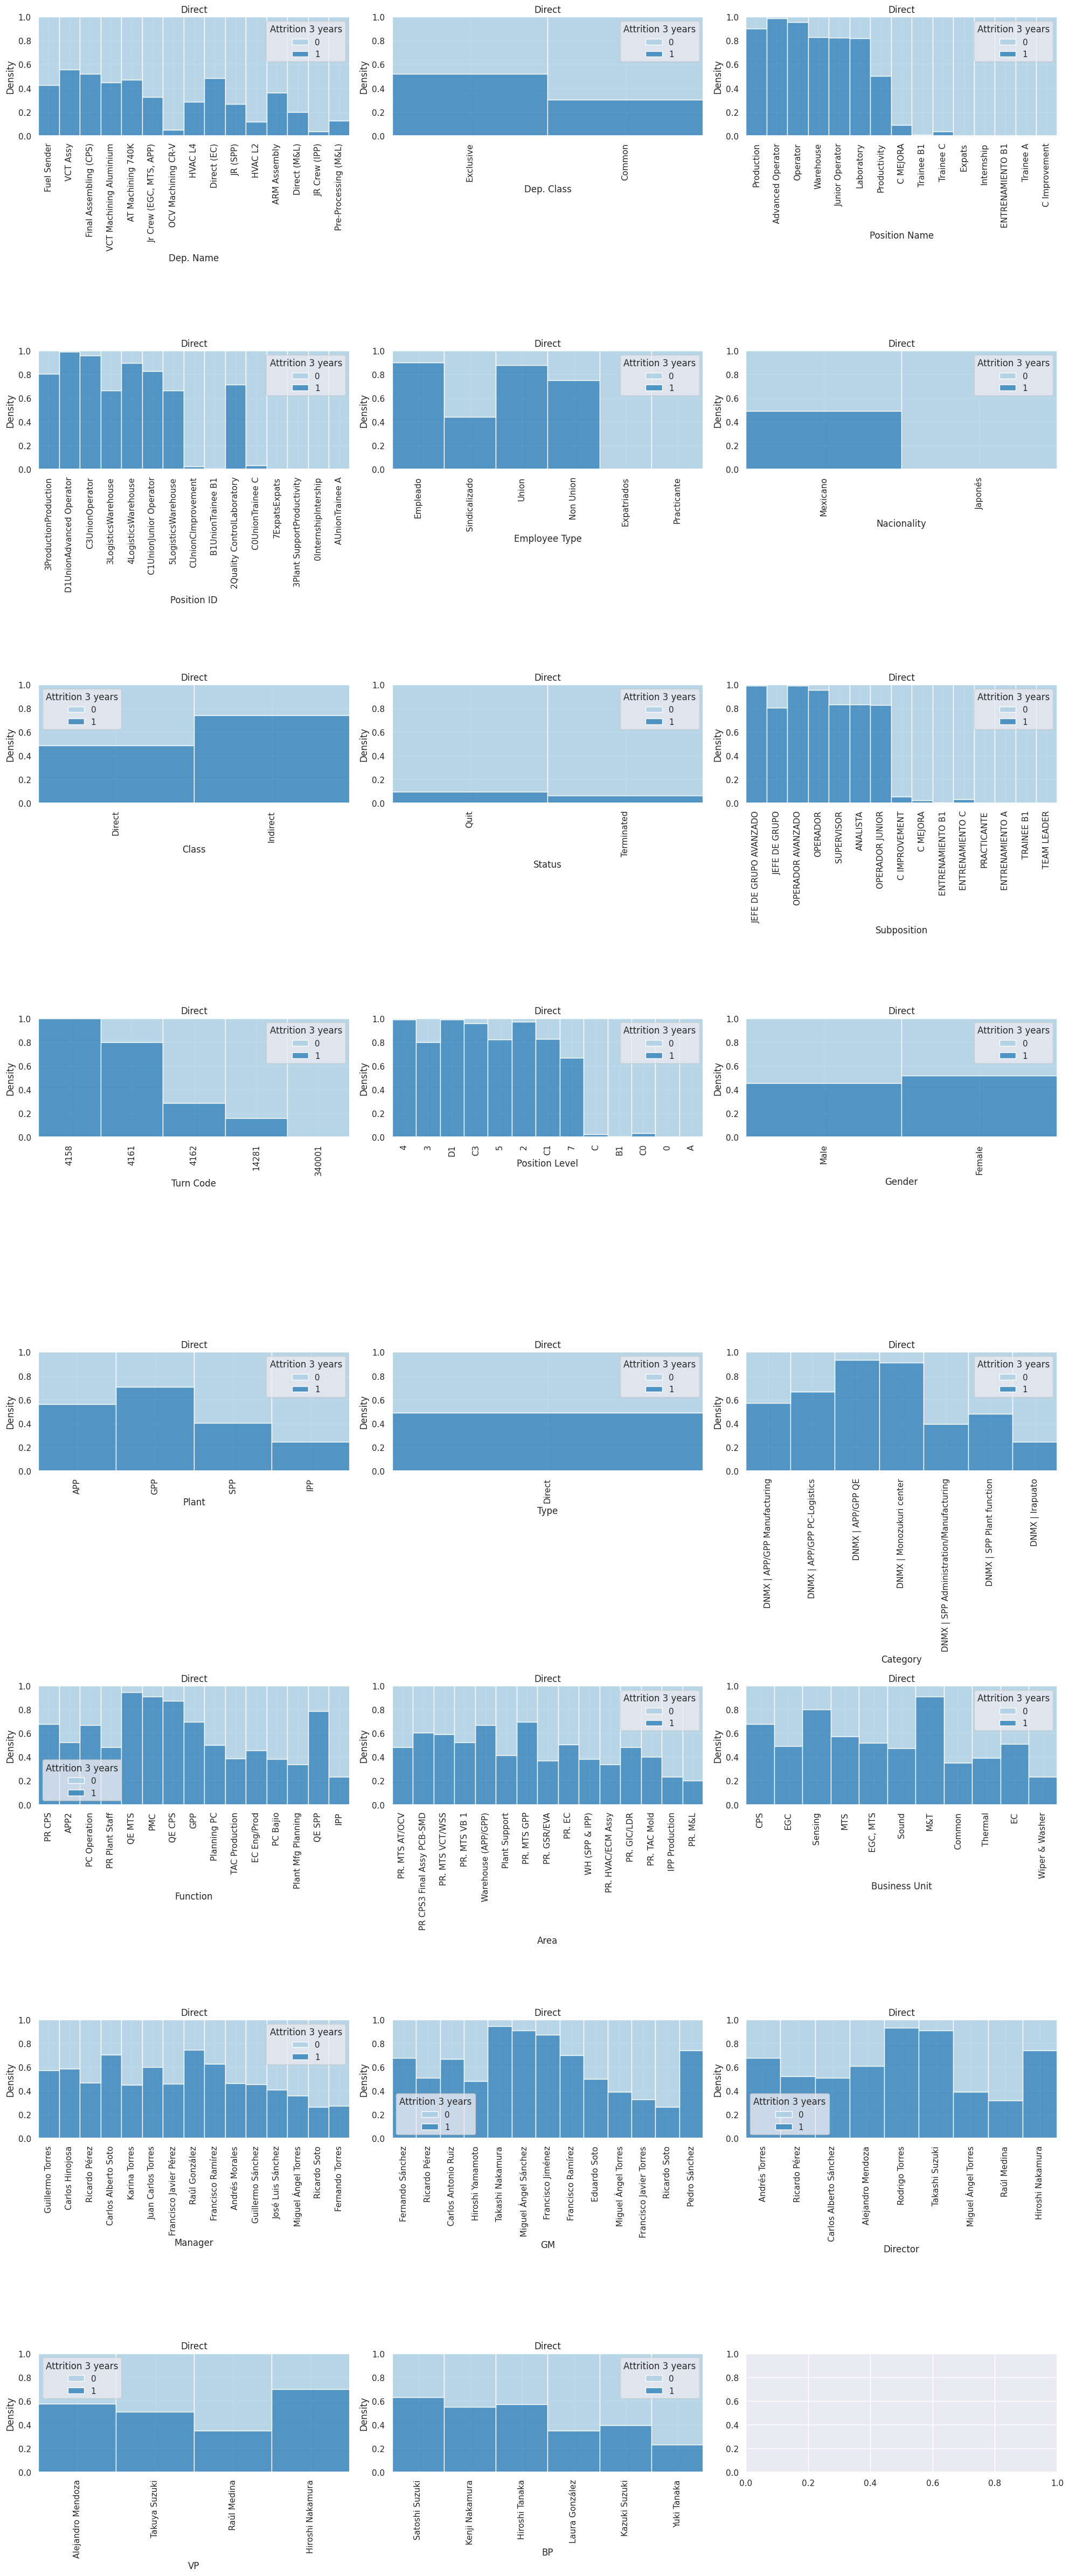

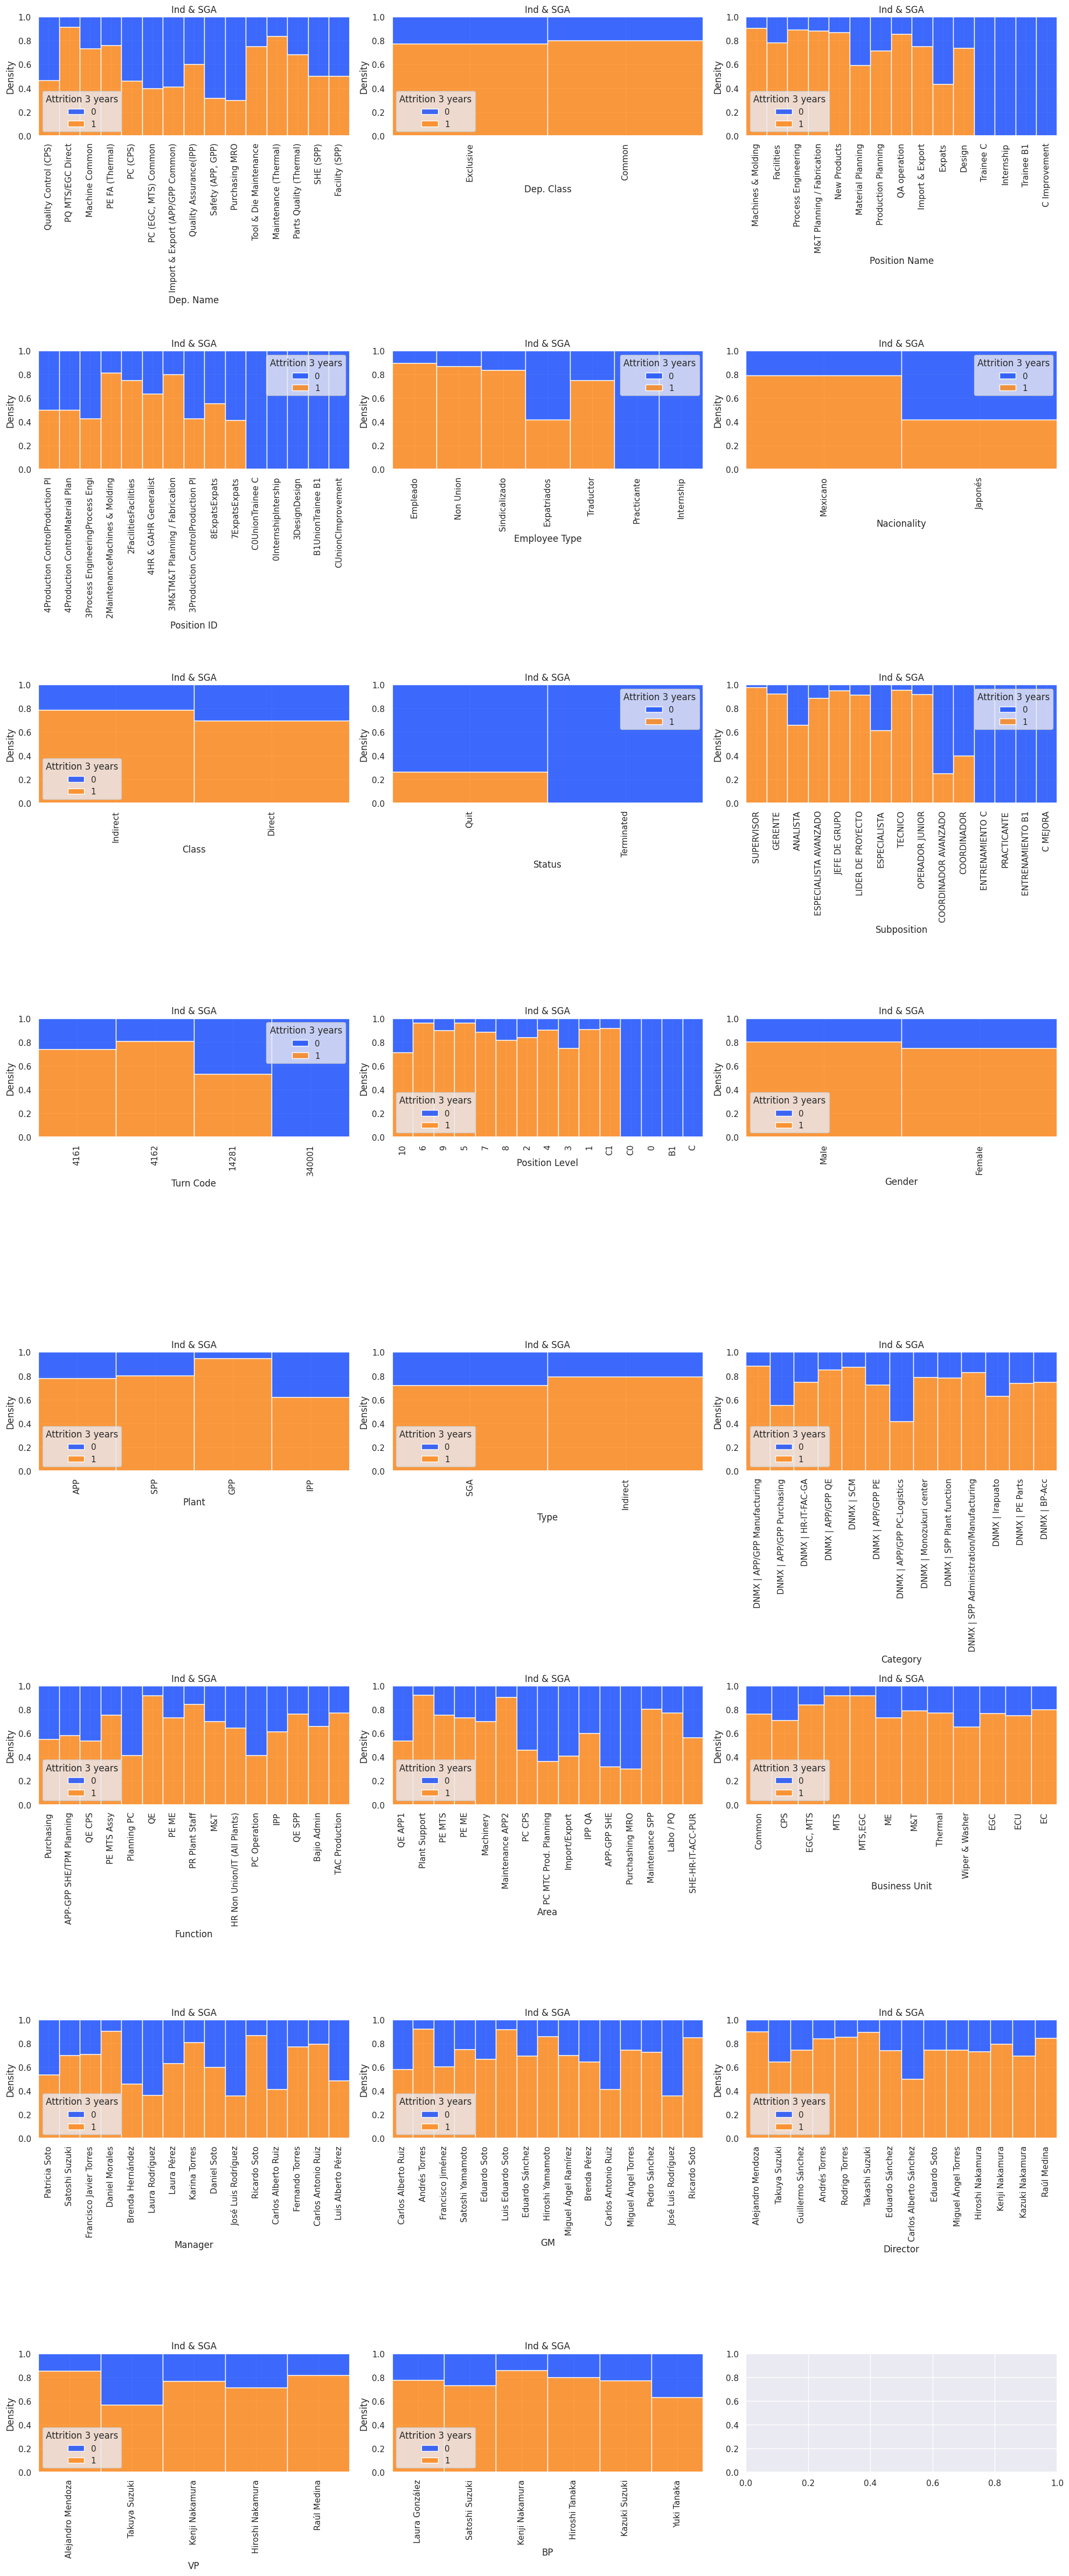

In [52]:
# Crear figuras con subplots para Directos
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Directos
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_directos[df_directos['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Ordenar los datos por las categorías ordenadas
    df_sorted = df_directos[df_directos[var].isin(sorted_categories)]

    # Crear un countplot para la variable filtrada y ordenada para Directos
    sns.histplot(x=var, hue='Attrition 3 years', data=df_sorted, multiple="fill", kde=False, element="bars", fill=True, stat="density", ax=axs[i], palette='Paired')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Direct')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Directos
plt.show()

# Crear figuras con subplots para Indirectos y SGA
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Indirectos y SGA
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_indirectos_sga[df_indirectos_sga['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Ordenar los datos por las categorías ordenadas
    df_sorted = df_indirectos_sga[df_indirectos_sga[var].isin(sorted_categories)]

    # Crear un countplot para la variable filtrada y ordenada para Indirectos y SGA
    sns.histplot(x=var, hue='Attrition 3 years', data=df_sorted, multiple="fill", kde=False, element="bars", fill=True, stat="density", ax=axs[i], palette='bright')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Ind & SGA')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Indirectos y SGA
plt.show()

Conclusiones de variables categóricas:

1. **empleados directos** tienen mucha mayor probabilidad de durar menos de 3 años a diferencia de los indirectos y SGA.
2. **empleados de plantas de Guanajuato** tienen mayor probabilidad de durar menos que los de Nuevo León
3. **empleados SGA Analistas y Especialistas** tienen mayor probabilidad de durar menos que los demás, éstos son los primeros dos puestos de entrada.
4. **empleados en categorías purchasing y PC-Logistics** tienen mayor probabilidad de durar menos que los demás.

## **Transformaciones**

In [58]:
print("Longitud de num_vars:", len(num_vars))

Longitud de num_vars: 7392


In [59]:
print("Columnas de num_vars:", num_vars.columns)

Columnas de num_vars: Index(['ID', 'Dep. No.', 'Chief ID', 'Employee Type ID', 'Years in Company'], dtype='object')


In [60]:
print("Número de columnas en num_vars:", len(num_vars.columns))

Número de columnas en num_vars: 5


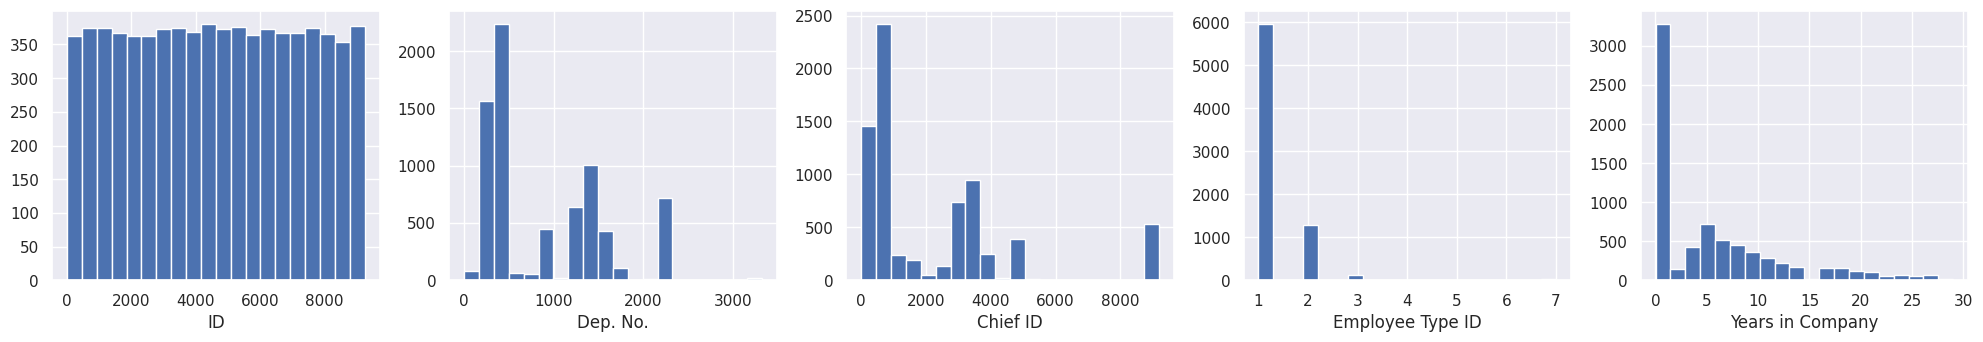

In [61]:
# Variables de entrada del conjunto de Entrenamiento:

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Crear los histogramas para cada variable
for k, col in enumerate(num_vars.columns):
    plt.subplot(6, 5, k + 1)  # Organizar los subgráficos en una matriz de 6x5
    plt.hist(num_vars[col], bins=20)
    plt.xlabel(col)

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

No se va a realizar ninguna transformación

## **Realizamos el análisis para los datos de tipo categórico binario y aplica la transformación LabelEncoder() de sklearn a estas variables.**

In [62]:
cat_vars.nunique()

Dep. Name         284
Dep. Class          2
Position Name     103
Position ID       214
Employee Type       8
Nacionality         2
Class               2
Status              3
Subposition        47
Turn Code          13
Position Level     19
Gender              2
Plant               4
Type                3
Category           16
Function           47
Area               83
Business Unit      16
Manager            76
GM                 36
Director           18
VP                  6
BP                  6
dtype: int64